In [4]:
import pandas as pd
import os

# Define the base directory
# base_dir = "/Users/michaellight/Desktop/py_projects/vital_strategies/cdmx_traffic_dashboard/accident_data"
base_dir = "./accident_data"

# Define the years that do not have headers
years_without_headers = range(2020, 2024)

# Initialize an empty list to hold the DataFrames
dfs = []

# Read the headers from the Excel file
# headers_df = pd.read_excel('/Users/michaellight/Desktop/py_projects/vital_strategies/cdmx_traffic_dashboard/accident_data/diccionario-percances-viales-axa-1.xlsx', usecols=[0], skiprows=0)
headers_df = pd.read_excel('./accident_data/diccionario-percances-viales-axa-1.xlsx', usecols=[0], skiprows=0)
headers = headers_df.iloc[:, 0].tolist()

# Insert "Día Numero" at the next index
headers.insert(headers.index("Mes Reporte") + 1, "Día Numero")

# Loop over the years
for year in years_without_headers:
    # Get the directory for this year
    dir_path = os.path.join(base_dir, str(year))
    
    # Get a list of all the CSV files in this directory
    csv_files = [f for f in os.listdir(dir_path) if f.endswith('.csv')]
    
    # Loop over the CSV files
    for csv_file in csv_files:
        # Define the file path
        file_path = os.path.join(dir_path, csv_file)
        
        # Read the CSV file into a DataFrame using the headers
        df = pd.read_csv(file_path, encoding='ISO-8859-1', names=headers, header=None, index_col=False)       

        # Append the DataFrame to the list
        dfs.append(df)

# Concatenate all the DataFrames in the list
df_without_headers = pd.concat(dfs, ignore_index=True)

/var/folders/29/ysfdqqh96xd2zvnqnqd_8fm80000gn/T/ipykernel_27900/3711100507.py:36: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='ISO-8859-1', names=headers, header=None, index_col=False)
/var/folders/29/ysfdqqh96xd2zvnqnqd_8fm80000gn/T/ipykernel_27900/3711100507.py:36: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='ISO-8859-1', names=headers, header=None, index_col=False)
/var/folders/29/ysfdqqh96xd2zvnqnqd_8fm80000gn/T/ipykernel_27900/3711100507.py:36: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='ISO-8859-1', names=headers, header=None, index_col=False)
/var/folders/29/ysfdqqh96xd2zvnqnqd_8fm80000gn/T/ipykernel_27900/3711100507.py:36: DtypeWarning: Columns (0,21) have mixed types. Specify dtype option on imp

In [5]:
# Define the years that have headers
years_with_headers = range(2015, 2020)

# Initialize an empty list to hold the DataFrames
dfs = []

# Loop over the years
for year in years_with_headers:
    # Define the file path
    file_path = os.path.join(base_dir, str(year), f"incidentes_viales_{year}_axa.csv")
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
    
    # Append the DataFrame to the list
    dfs.append(df)

/var/folders/29/ysfdqqh96xd2zvnqnqd_8fm80000gn/T/ipykernel_27900/3208485971.py:13: DtypeWarning: Columns (0,1,2,3,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='ISO-8859-1')
/var/folders/29/ysfdqqh96xd2zvnqnqd_8fm80000gn/T/ipykernel_27900/3208485971.py:13: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='ISO-8859-1')


In [8]:
from unidecode import unidecode
import numpy as np

dfs = [df_without_headers] + dfs

for df in dfs:
    df.columns = [col.lower().strip() for col in df.columns]
    
for i in range(len(dfs)):
    # Change column names to snake case and remove accents
    dfs[i].columns = [unidecode(col.lower().replace(' ', '_')) for col in dfs[i].columns]
    
for i in range(len(dfs)):
    # Remove "_reporte" from column names
    dfs[i].columns = dfs[i].columns.str.replace('_reporte', '')
    
for df in dfs:
    df.rename(columns={'daa_numero': 'dia_numero'}, inplace=True)
    
for df in dfs:
    df.rename(columns={'aao': 'ano'}, inplace=True)
    
for df in dfs:
    df.rename(columns={'nivel_daao_vehiculo': 'nivel_dano_vehiculo'}, inplace=True)

for df in dfs:
    df.rename(columns={'causa_siniestro': 'tipo_de_percance'}, inplace=True)
    
for df in dfs:
    df.rename(columns={'punto_de_impacto': 'punto_impacto'}, inplace=True)  
    
for df in dfs:
    df.rename(columns={'ciudad': 'ciudad_municipio'}, inplace=True)
    
for df in dfs:
    df.rename(columns={'lesionados': 'total_lesionados'}, inplace=True)
    
for df in dfs:
    df.rename(columns={'relacion_lesionados': 'rol_lesionado'}, inplace=True)    
    
for df in dfs:
    df.rename(columns={'nivel_lesionados':'nivel_lesion'}, inplace=True)    

for df in dfs:
    df.rename(columns={'obra_civil': 'dano_obra_civil'}, inplace=True)    

for df in dfs:
    df.rename(columns={'fuga': 'tercero_fuga'}, inplace=True)  
    
for df in dfs:
    df.rename(columns={'seguro': 'aseguradora'}, inplace=True)   
    
for df in dfs:
    df.rename(columns={'taxi': 'servicio_taxi'}, inplace=True)
    
for i in range(len(dfs)):
    if 'rol_lesionado' not in dfs[i].columns:
        dfs[i] = dfs[i].assign(rol_lesionado=np.nan)
    if 'nivel_lesio' not in dfs[i].columns:
        dfs[i] = dfs[i].assign(nivel_lesion=np.nan)  

# Get the common columns
common_columns = set.intersection(*[set(df.columns) for df in dfs])

common_columns = list(common_columns)

# Concatenate all the dataframes, keeping only the common columns
df_final = pd.concat([df[common_columns] for df in dfs], ignore_index=True)

In [9]:
# a bit of data validation

total_rows = sum(df.shape[0] for df in dfs)

if total_rows == df_final.shape[0]:
    print("No rows were dropped during cleaning")
else:
    "Rows were dropped during cleaning"

No rows were dropped during cleaning


In [10]:
df_final = df_final.drop_duplicates()

In [11]:
# Convert to lower case and strip whitespace
headers = [col.lower().strip() for col in headers]

# Change to snake case and remove accents
headers = [unidecode(col.replace(' ', '_')) for col in headers]

# Remove "_reporte" from column names
headers = [col.replace('_reporte', '') for col in headers]

In [12]:
df_final = df_final[headers]

In [13]:
# Count the total number of "\N" values in df_final
count_before = (df_final == "\\N").sum().sum()

# Replace all "\N" with NaN
df_final = df_final.replace("\\N", np.nan)

# Count the total number of NaN values in df_final
count_after = df_final.isnull().sum().sum()

# Print the total number of values that were replaced
print("Total number of values replaced:", count_after - count_before)

Total number of values replaced: 63606122


In [14]:
# List of columns to convert
cols_to_convert = pd.concat([df_final.loc[:, 'siniestro':'codigo_postal'], df_final[['modelo', 'ano', 'dia_numero', 'hora', 'total_lesionados', 'edad_lesionado']], df_final.loc[:, 'ambulancia':'animal']], axis=1).columns

# Initialize counter for total number of values that will be coerced to NaN
total_coerced = 0

for col in cols_to_convert:
    try:
        # Count the number of values that will be coerced to NaN
        coerce_mask = pd.to_numeric(df_final[col], errors='coerce').isna() & df_final[col].notna()
        total_coerced += coerce_mask.sum()

        # Convert the column to numeric, coercing non-numeric values to NaN
        df_final[col] = pd.to_numeric(df_final[col], errors='coerce')

    except Exception as e:
        print(f"Error converting column {col}: {e}")

# Print the total number of values that were coerced to NaN
print("Total number of values coerced to NaN:", total_coerced)

Total number of values coerced to NaN: 1885


In [15]:
# List of columns to convert to string
cols_to_convert_to_str = ['calle', 'color', 'nivel_dano_vehiculo', 'punto_impacto', 'mes', 'dia', 'estado', 'ciudad_municipio', 'rol_lesionado', 'genero_lesionado', 'hospitalizado', 'fallecido']

# Convert each column to string
for col in cols_to_convert_to_str:
    df_final[col] = df_final[col].astype('string', errors='ignore')

In [17]:
#switching to polars to take advantage of expressions

import polars as pl

# Convert all columns to appropriate data types in pandas before converting to Polars
for col in df_final.columns:
    if df_final[col].dtype == 'object':
        try:
            df_final[col] = df_final[col].astype('string')
        except ValueError:
            pass

# Now convert the pandas DataFrame to a Polars DataFrame
pl_df = pl.from_pandas(df_final)

In [18]:
# List of all months in Spanish
months_spanish = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']

# List of all months in English
months_english = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

pl_df = pl_df.with_columns(
    pl.col("mes")
    .str.to_lowercase()
    .str.replace_many(
    months_spanish,
    months_english    
    )  
    )

In [19]:
pl_df = pl_df.with_columns(
    pl.col("nivel_dano_vehiculo")
    .str.replace_many(
    ["Bajo", "Alto", "Medio", "Sin "],
    ["Low", "High", "Medium", "No damage"]    
    )
    .str.replace("No damage.*", "No damage")
)  

In [20]:
pl_df = pl_df.with_columns(
    pl.col("nivel_dano_vehiculo")
    .str.replace_many(
    ["Low", "High", "Medium", "No damage"],
    ["2", "4", "3", "1"]    
    )
    .str.replace("1.*", "1")
     .cast(pl.Int64, strict=False)
)  

In [22]:
numbers = [str(i) for i in range(1, 13)]

pl_df = pl_df.with_columns(
    pl.col("mes")
    .str.replace_many(
    months_english,
    numbers
    )
    .cast(pl.Int64)
)

In [23]:
pl_df.head()

siniestro,latitud,longitud,codigo_postal,calle,colonia,tipo_de_percance,tipo_vehiculo,color,modelo,nivel_dano_vehiculo,punto_impacto,ano,mes,dia_numero,dia,hora,estado,ciudad_municipio,total_lesionados,rol_lesionado,edad_lesionado,genero_lesionado,nivel_lesion,hospitalizado,fallecido,ambulancia,arbol,piedra,dormido,grua,dano_obra_civil,pavimento_mojado,explosion_llanta,volcadura,perdida_total,conductor_distraido,tercero_fuga,alcohol,motocicleta,bicicleta,aseguradora,servicio_taxi,animal
f64,f64,f64,f64,str,str,str,str,str,f64,i64,str,i64,i64,i64,str,i64,str,str,i64,str,f64,str,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
5.948953e6,17.536272,-99.496947,39095.0,"""Av. Lazaro Car…","""COLONIA LA CIN…","""COLISION Y/O V…","""Auto""","""ROJO""",2007.0,2,"""Trasero""",2020,10,1,"""JUEVES""",12,"""GUERRERO""","""CHILPANCINGO D…",0,null,0.0,null,null,"""NO""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
5.947275e6,16.862052,-99.896002,39300.0,"""Bernal DÃ­az d…","""PROGRESO""","""COLISION Y/O V…","""Auto""","""BLANCO""",2007.0,1,"""Cofre""",2020,10,1,"""JUEVES""",16,"""GUERRERO""","""ACAPULCO DE JU…",0,null,0.0,null,null,"""NO""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
5.941145e6,16.844717,-99.848868,39300.0,"""Costera Miguel…","""col icacos""","""COLISION Y/O V…","""Auto""","""blanco""",2012.0,null,null,2020,10,1,"""JUEVES""",18,"""GUERRERO""","""ACAPULCO DE JU…",0,null,0.0,null,null,"""NO""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
5.949668e6,17.517569,-99.476248,39095.0,"""Calle Eduardo …","""Villas del Par…","""COLISION Y/O V…","""Auto""","""NEGRO""",2005.0,2,"""Frontal""",2020,10,2,"""VIERNES""",15,"""GUERRERO""","""CHILPANCINGO D…",0,null,0.0,null,null,"""NO""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
5.950147e6,16.862064,-99.882687,39300.0,"""wilfrido massi…","""col magallanes…","""COLISION Y/O V…","""Auto""","""AZUL""",2019.0,1,"""Cofre""",2020,10,2,"""VIERNES""",18,"""GUERRERO""","""ACAPULCO DE JU…",0,null,0.0,null,null,"""NO""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


In [24]:
filtered_df = pl_df.filter(
    pl.col("estado").str.contains_any(['ciudad', 'Ciudad', 'CIUDAD']),
    pl.col("nivel_dano_vehiculo") > 0
)

In [25]:
#creating a clean and translated csv for future use

filtered_df.write_csv("cdmx_data.csv", separator=",")

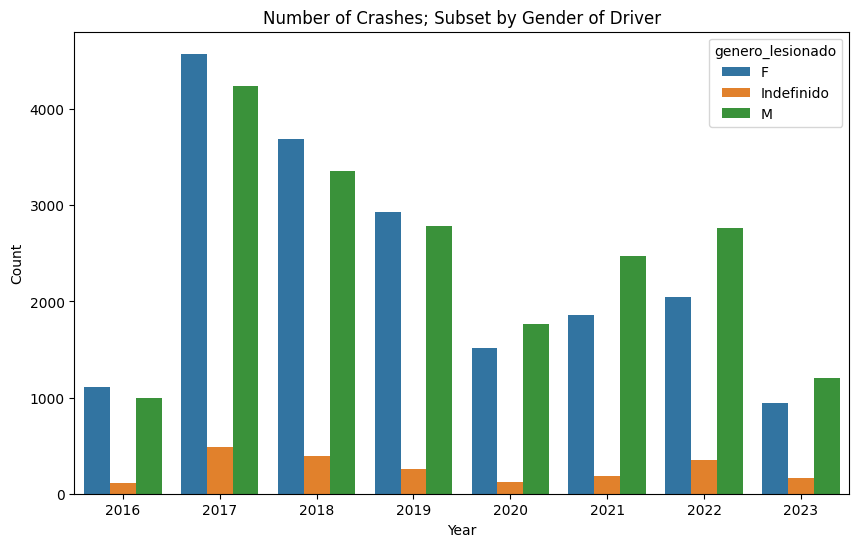

In [36]:
#quick visualization of crashes subset by driver gender

import matplotlib.pyplot as plt
import seaborn as sns

df = filtered_df.to_pandas()

grouped_df = df.groupby(['ano', 'genero_lesionado']).size().reset_index(name='counts')

plt.figure(figsize=(10, 6))
sns.barplot(x='ano', y='counts', hue='genero_lesionado', data=grouped_df, dodge = True)

plt.title('Number of Crashes; Subset by Gender of Driver')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()